<a href="https://colab.research.google.com/github/stazam/M7DataSp---Advanced-data-science-techniques/blob/main/tweet_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.utils import np_utils
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.3.0


Postup:

1. načítať dáta - krátky pohľad na dáta, počet unikátnych userov, tweetov
2. vytvoriť data.frame s ktorým budem daľej pracovať
3. embedding pre users, tweets
4. predikcia - doplnenie tabuľky
5. pokúsiť sa využiť bias na usera a movie - pokúsiť sa zlepšiť hodnotu 


In [5]:
from google.colab import files 

uploaded = files.upload()

Saving fake_v1_100x252.csv to fake_v1_100x252.csv


In [6]:
df = pd.read_csv(r'/content/fake_v1_100x252.csv')

In [7]:
df.head(6)

,Unnamed: 0,tweet1,tweet2,tweet3,tweet4,tweet5,tweet6,tweet7,tweet8,tweet9,tweet10,tweet11,tweet12,tweet13,tweet14,tweet15,tweet16,tweet17,tweet18,tweet19,tweet20,tweet21,tweet22,tweet23,tweet24,tweet25,tweet26,tweet27,tweet28,tweet29,tweet30,tweet31,tweet32,tweet33,tweet34,tweet35,tweet36,tweet37,tweet38,tweet39,...,tweet213,tweet214,tweet215,tweet216,tweet217,tweet218,tweet219,tweet220,tweet221,tweet222,tweet223,tweet224,tweet225,tweet226,tweet227,tweet228,tweet229,tweet230,tweet231,tweet232,tweet233,tweet234,tweet235,tweet236,tweet237,tweet238,tweet239,tweet240,tweet241,tweet242,tweet243,tweet244,tweet245,tweet246,tweet247,tweet248,tweet249,tweet250,tweet251,tweet252
0,user1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1,user2,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,6.0,5.0,3.0,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,4.0,NaN,NaN,5.0,...,NaN,3.0,NaN,3.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2,user3,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,4.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,user4,4.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,4.0,4.0,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,user5,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,4.0,NaN,5.0,NaN,4.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN
5,user6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,...,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [8]:
n_users = df.iloc[:,0].values.shape[0]
n_tweets = df.columns[1:].shape[0]

percentage = df.isna().sum().values.sum() / (n_tweets * n_users)

print("Shape of data matrix is %d - \"number of unique users\" and %d - \"number of unique tweets\"" % (n_users, n_tweets))
print("Percentage of unlabeled tweets in the whole dataset is %.2f%% " %(100*percentage) )

Shape of data matrix is 100 - "number of unique users" and 252 - "number of unique tweets"
Percentage of unlabeled tweets in the whole dataset is 80.16% 


In [58]:
df_new = pd.DataFrame(columns = ['user_id','tweet_id','ratings'])
df_new

,user_id,tweet_id,ratings


In [59]:
for i in range(0,n_users):
  for j in range(1,n_tweets+1):
     
    if pd.isna(df.iloc[i,j]) == False:
      df_new = df_new.append({'user_id':i+1,'tweet_id':j,'ratings':df.iloc[i,j]},ignore_index=True)

df_new

,user_id,tweet_id,ratings
0,1.0,1.0,4.0
1,1.0,21.0,5.0
2,1.0,24.0,5.0
3,1.0,27.0,5.0
4,1.0,40.0,4.0
...,...,...,...
4995,100.0,234.0,4.0
4996,100.0,237.0,3.0
4997,100.0,248.0,5.0
4998,100.0,249.0,5.0


In [84]:
len(df_new.tweet_id.unique())

252

In [67]:
def embedding_input(name,n_in,n_out):
  inp = layers.Input(shape = (1,) )
  return inp, layers.Embedding(n_in, n_out, input_length = 1, name = name)(inp)

In [97]:
n_tweets

252

In [128]:
from keras.models import Model

n_out = 3

inp = layers.Input(dtype= 'int64',shape = [1] )
u = layers.Embedding(n_users+1, n_out)(inp)
user_vec = layers.Flatten()(u)

inp1 = layers.Input(dtype= 'int64',shape = [1] )
v = layers.Embedding(n_tweets+1, n_out)(inp1)
tweet_vec = layers.Flatten()(v)

prod = layers.Dot(axes = 1)([user_vec, tweet_vec])

pred = layers.Dense(1 , activation = 'relu')(prod)
model = Model([inp,inp1], pred)


model.compile(loss = 'mse',metrics = ['mae'] ,optimizer = 'rmsprop')

model.summary()

Model: "functional_42"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_54 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_55 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_38 (Embedding)        (None, 1, 3)         303         input_54[0][0]                   
__________________________________________________________________________________________________
embedding_39 (Embedding)        (None, 1, 3)         759         input_55[0][0]                   
______________________________________________________________________________________

In [129]:
history = model.fit([df_new.user_id,df_new.tweet_id], y = df_new.ratings, validation_split = 0.2, epochs = 100, batch_size = 32)

Epoch 1/100
125/125 [==============================] - 0s 2ms/step - loss: 17.0229 - mae: 4.0758 - val_loss: 16.2215 - val_mae: 3.9925
Epoch 2/100
125/125 [==============================] - 0s 1ms/step - loss: 16.0160 - mae: 3.9504 - val_loss: 15.2412 - val_mae: 3.8678
Epoch 3/100
125/125 [==============================] - 0s 1ms/step - loss: 15.0405 - mae: 3.8249 - val_loss: 14.2932 - val_mae: 3.7432
Epoch 4/100
125/125 [==============================] - 0s 1ms/step - loss: 14.0722 - mae: 3.6962 - val_loss: 13.3765 - val_mae: 3.6187
Epoch 5/100
125/125 [==============================] - 0s 1ms/step - loss: 13.0882 - mae: 3.5604 - val_loss: 12.4916 - val_mae: 3.4943
Epoch 6/100
125/125 [==============================] - 0s 1ms/step - loss: 12.0634 - mae: 3.4135 - val_loss: 11.6375 - val_mae: 3.3698
Epoch 7/100
125/125 [==============================] - 0s 1ms/step - loss: 10.9794 - mae: 3.2510 - val_loss: 10.8153 - val_mae: 3.2456
Epoch 8/100
125/125 [==============================] - 

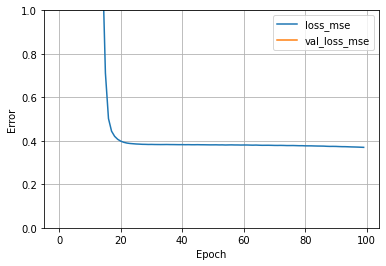

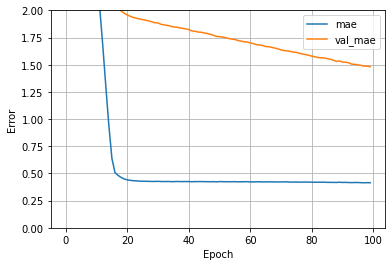

In [130]:
def plot_loss(model):
  plt.figure(1)
  plt.plot(model.history['loss'], label='loss_mse')
  plt.plot(model.history['val_loss'], label='val_loss_mse')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

  plt.figure(2)
  plt.plot(model.history['mae'], label='mae')
  plt.plot(model.history['val_mae'], label='val_mae')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)


plot_loss(history)

In [138]:
model.predict([df.dataFrame(range(1,100)),data.Frame(range(1,100))])

NameError: ignored

In [146]:
skuska = np.array(range(1,100))
skuska1 = np.array(range(1,100))

In [148]:
np.array(1)

array(1)

In [156]:
df_filled = df.copy()

for i in range(0,n_users):
  for j in range(1,n_tweets+1):
     
    if pd.isna(df_filled.iloc[i,j]):
      model.predict([np.array([i]),np.array([j])])

,Unnamed: 0,tweet1,tweet2,tweet3,tweet4,tweet5,tweet6,tweet7,tweet8,tweet9,tweet10,tweet11,tweet12,tweet13,tweet14,tweet15,tweet16,tweet17,tweet18,tweet19,tweet20,tweet21,tweet22,tweet23,tweet24,tweet25,tweet26,tweet27,tweet28,tweet29,tweet30,tweet31,tweet32,tweet33,tweet34,tweet35,tweet36,tweet37,tweet38,tweet39,...,tweet213,tweet214,tweet215,tweet216,tweet217,tweet218,tweet219,tweet220,tweet221,tweet222,tweet223,tweet224,tweet225,tweet226,tweet227,tweet228,tweet229,tweet230,tweet231,tweet232,tweet233,tweet234,tweet235,tweet236,tweet237,tweet238,tweet239,tweet240,tweet241,tweet242,tweet243,tweet244,tweet245,tweet246,tweet247,tweet248,tweet249,tweet250,tweet251,tweet252
0,user1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1,user2,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,6.0,5.0,3.0,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,4.0,NaN,NaN,5.0,...,NaN,3.0,NaN,3.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2,user3,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,4.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,user4,4.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,4.0,4.0,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,user5,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,4.0,NaN,5.0,NaN,4.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,user96,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,5.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,3.0,NaN,4.0,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN
96,user97,NaN,4.0,4.0,NaN,NaN,4.0,NaN,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,4.0,NaN,NaN,4.0,...,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN
97,user98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,4.0,NaN
98,user99,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
